# Intro
Some scripts for visualizing energy modes in 1d systems, written as supplement as I followed along with the [Topocondmat course](https://topocondmat.org/w1_topointro/1D.html).

# Scripts
### majorana_modes.py
Main script. Plot the energy levels for Kitaev or SSH chain. Parameters can also be tweaked via command line args.

### Examples:
```
# Plot energies for Kitaev model as mu/t is tuned:
python majorana_modes.py kitaev

# as last-to-first-site hopping is tuned(default mu/t=0)
python majorana_modes.py kitaev --tune x 

# with mu/t set at 3
py majorana_modes.py kitaev --tune x -m 3.0 
```
To do the same for the SSH model, replace `'kitaev'` arg with `'ssh'`. In SSH model case, default tuning parameter is `t2/t1`  (ratio of the two hopping strengths, no cooper-pairing).

#### Optional args:
- `-N` (default `25`): Set number of sites
- `-m` (default `1`): Set onsite-energy mu value (ignored if mu is being tuned)
- `-d` (default `1`): Set value of Cooper pairing
- `-t` (default `1`): Set value of next-neighbor hopping (ignored if ssh model)
- `-x` (default `0.5`): Set parameter tuning last-to-first-site hopping. 
- `-t2` (default `1`): Set value of double-bond hopping (single-bond is always 1)
- `--plot-band-idxs` (default `0 1`): plot spatial distribution of these eigenstates, indexed by number (e.g. `0 1 2` includes third-lowest state).
- `--enforce-even-sites` (default `False`): in SSH model, enforce an even number of C-sites in the system.


# Demo:

First, plot the energy bands for the 1d Kitaev chain as the ratio (mu/t) of on-site energy to nearest-neighbor hopping is tuned:

Constructing BdG Hamiltonian for Kitaev chain tuning on-site energy...


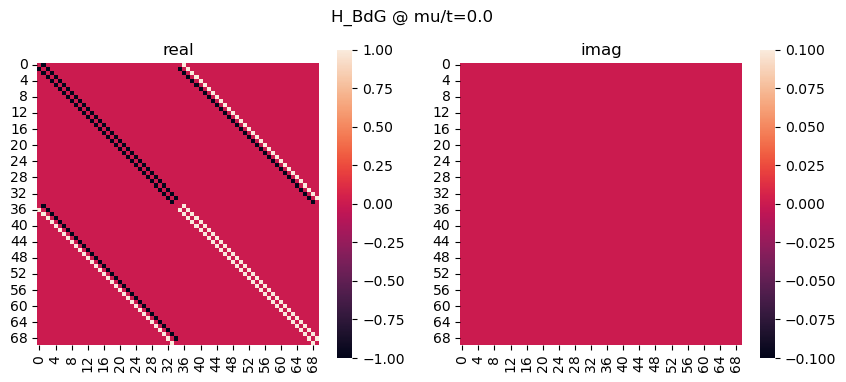

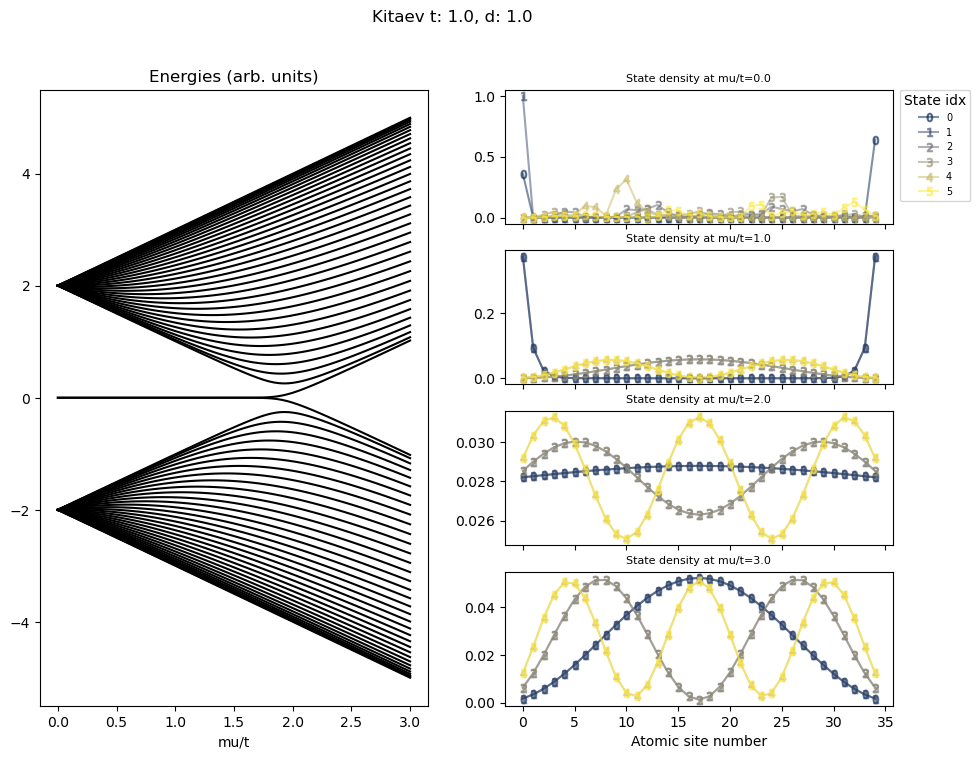

In [7]:
import numpy as np
from majorana_energies import H_BdG_constructor

# Set up initial set of params. 
model_params = {
    'nn_hopping': 1.0, 
    'cooper_pairing': 1.0, 
    'tuning_parameter': 'mu/t', 
    'parameter_space': np.linspace(0,3,100),
    'N_sites': 35,
}
# For now keep N small, and just visualize the Hamiltonian matrix
H_constructor = H_BdG_constructor('kitaev', model_params, show_ham=True, plot_band_idxs=[0,1,2])
H_constructor.construct_and_solve_hamiltonians()
H_constructor.plot_figures(param_values=[.0, 1, 2, 3], figsize=(11,8))

On the left side we see the similar band structure plotted in Topocondmat.

On the right side is the spatial distribution of some of the lowest-energy Majorana pairs.
Three interesting things:
1. At the highest `mu/t`=3, the individual majoranas are all paired up (completely overlapping spatial distribution), and their distributions just look like the regular ground/excited-state energies of an infinite potential well.

2. As we go toward smaller `mu/t`, the lowest-energy pair seem to get pushed out toward the ends of the chain, and at `mu/t`=1 they seem almost completely localized to the ends.

3. As we get to even closer to `mu/t`=0, while staying localized at the ends, the indivial majoranas of the lowest-energy pair start to share less and less spatial overlap.

Let's zoom in a little to the smaller `mu/t` space:

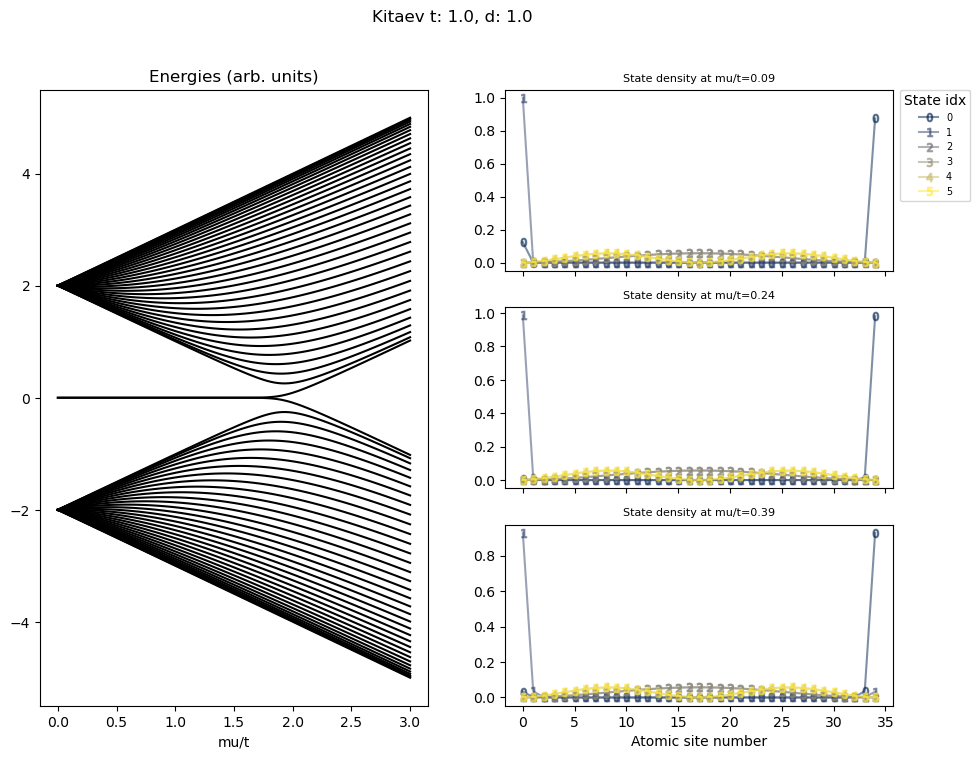

In [9]:

H_constructor.plot_figures(param_values=[0.1, 0.25, 0.4], figsize=(11,8))

With the increased number of sites, we see that the lowest- and second-lowest state densities ("converged" majoranas, aka basically electrons) look more and more like the densities for the ground and first excited states of an electron in a potential well.

Now let's see what happens when we make the potential well a periodic one by introducing hopping between the last and first site:

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


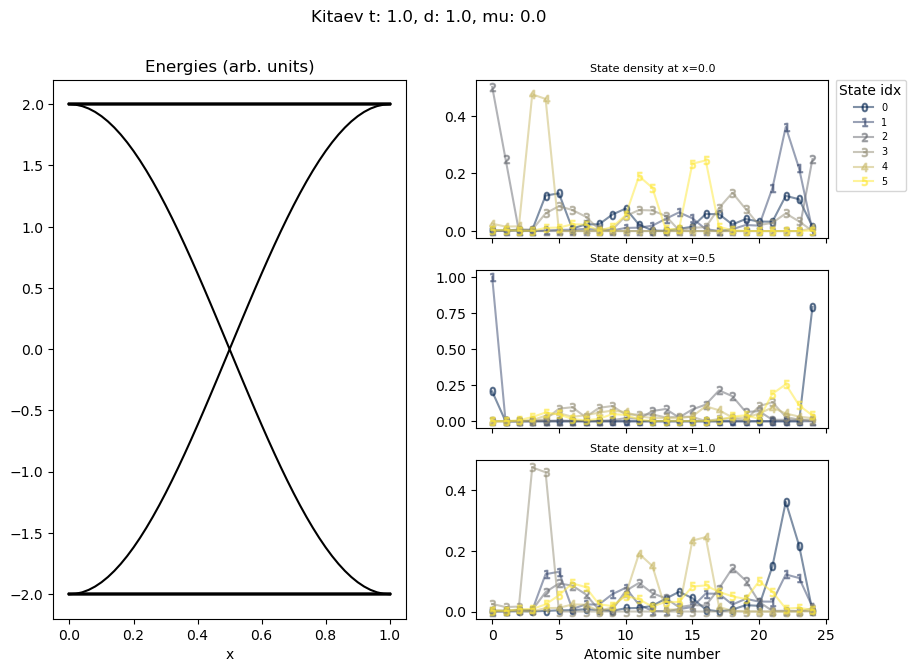

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


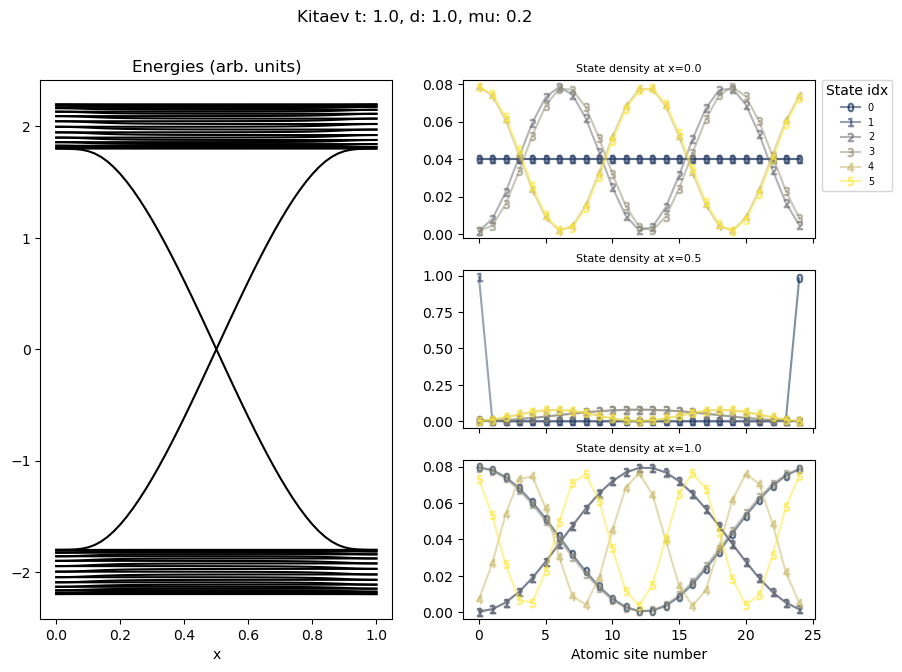

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


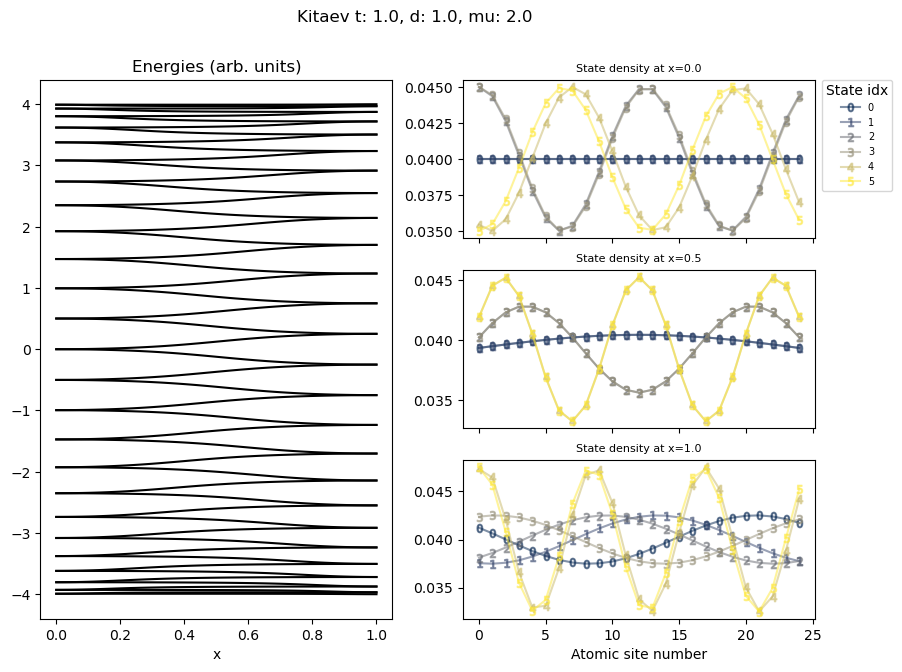

Constructing BdG Hamiltoninan for Kitaev chain tuning N-to-1 hopping...


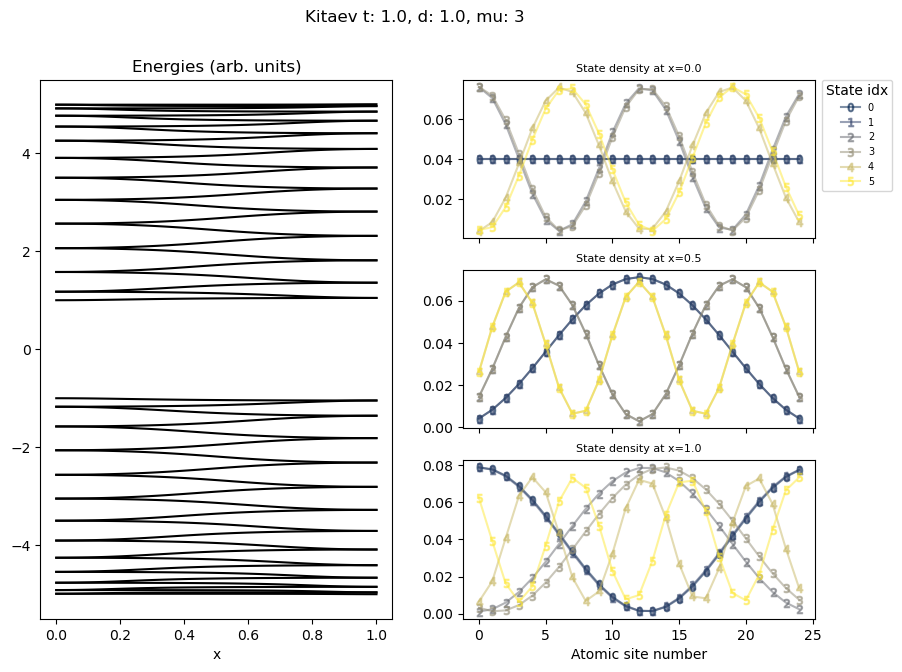

In [28]:
model_params = {
    'nn_hopping': 1.0, 
    'cooper_pairing': 1.0,
    'tuning_parameter': 'x', 
    'parameter_space': np.linspace(0.0, 1., 101),
    'N_sites': 25,
}

for mu in [0.00, 0.2, 2.0, 3]:
    model_params['onsite_energy'] = mu
    H_constructor = H_BdG_constructor('kitaev', model_params, plot_band_idxs=[0,1,2])
    H_constructor.construct_and_solve_hamiltonians()
    H_constructor.plot_figures()